In [72]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [125]:
path_to_data = "/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_student_f20/Project/Dataset/student"
mat = pd.read_csv(path_to_data+'/student-mat.csv', sep=";")
por = pd.read_csv(path_to_data+'/student-por.csv', sep=";")

In [112]:
mat = mat.rename(columns={'G1': 'Math 1st period grade', 'G2':'Math 2nd period grade','G3': 'Math final grade'})

In [113]:
por = por.rename(columns={'G1': 'Portugese 1st period grade', 'G2':'Portugese 2nd period grade','G3': 'Portugese final grade'})

## Overview

## Math scores dataset

In [114]:
print(mat.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences Math 1st period  \
0      4        3      4     1     1      3        6               5   
1      5        3      3     1     1      3        4               5   
2      4        3      2     2     3      3       10               7   
3      3        2      2     1     1      5        2              15   
4      4        3      2     1     2      5        4               6   

  Math 2nd period grade Math final grade  
0                     6              

In [111]:
print(mat.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

In [25]:
print(mat.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


## Portugese scores dataset

In [19]:
print(por.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [24]:
print(por.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.0510

In [26]:
print(por.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


## Visualizations

## Categorical columns

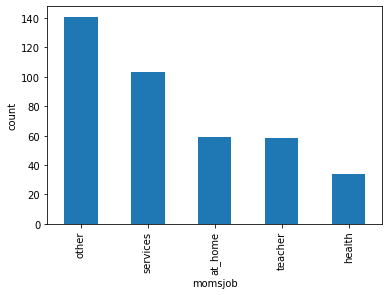

In [37]:
pd.value_counts(mat['Mjob']).plot.bar()
plt.ylabel('count')
plt.xlabel('momsjob')
plt.show()

## Continous Columns

## Math scores dataset

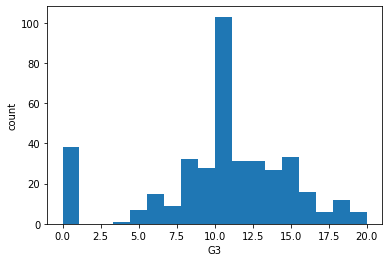

In [136]:
mat['G3'].plot.hist(bins = mat['G3'].nunique())  
plt.xlabel('G3')
plt.ylabel('count')
plt.show()

## Portugese scores dataset

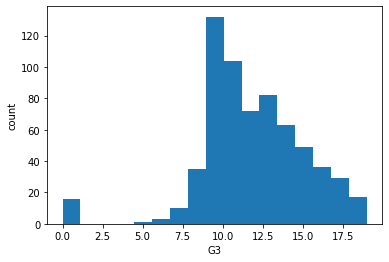

In [176]:
por['G3'].plot.hist(bins = por['G3'].nunique())  
plt.xlabel('G3')
plt.ylabel('count')
plt.show()

## Continous vs continous 

## Math scores dataset

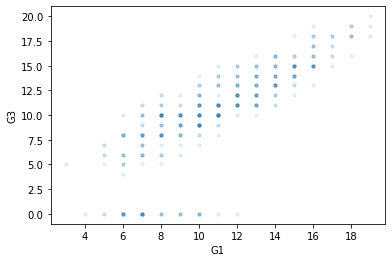

In [138]:
mat.plot.scatter('G1','G3',s=10,alpha=0.1) # alpha=0.1,s=10
plt.show()

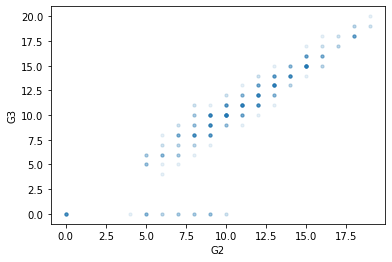

In [137]:
mat.plot.scatter('G2','G3',s=10,alpha=0.1) # alpha=0.1,s=10
plt.show()

## Portugese scores dataset

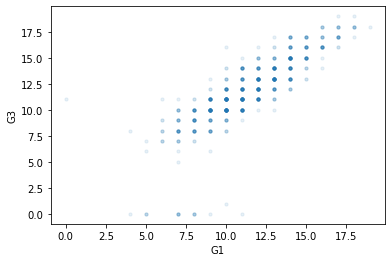

In [179]:
por.plot.scatter('G1','G3',s=10,alpha=0.1) # alpha=0.1,s=10
plt.show()

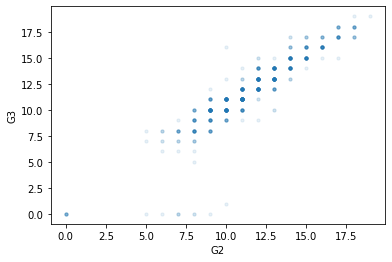

In [178]:
por.plot.scatter('G2','G3',s=10,alpha=0.1) # alpha=0.1,s=10
plt.show()

## Categorical vs Categorical Columns 

## Math scores dataset

In [198]:
mat_matrix = mat.groupby(['famsup', 'paid']).size().unstack()
print(mat_matrix)

paid     no  yes
famsup          
no      111   42
yes     103  139


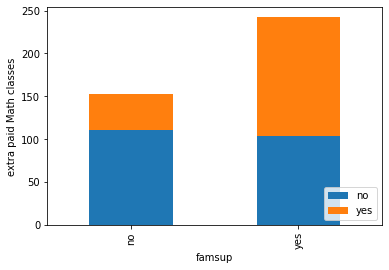

In [199]:
mat_matrix.plot(kind='bar', stacked=True)
plt.ylabel('extra paid Math classes')
plt.legend(loc=4)
plt.show()

## Portugese scores dataset

In [200]:
por_matrix = por.groupby(['famsup', 'paid']).size().unstack()
print(count_matrix)

paid     no  yes
famsup          
no      111   42
yes     103  139


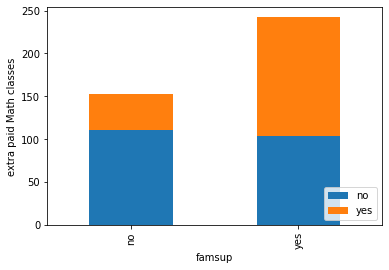

In [201]:
count_matrix.plot(kind='bar', stacked=True)
plt.ylabel('extra paid Math classes')
plt.legend(loc=4)
plt.show()

## Continous vs Catergorical Columns 

In [180]:
import seaborn as sns 

## Math score dataset

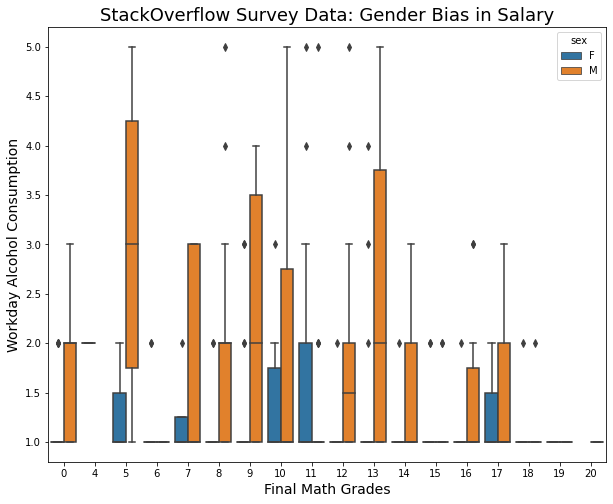

In [189]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="G3", y="Dalc", hue='sex',data=mat)
plt.ylabel("Workday Alcohol Consumption", size=14)
plt.xlabel("Final Math Grades",size=14)
plt.title("StackOverflow Survey Data: Gender Bias in Salary", size=18)
plt.savefig("grouped_boxplot_Seaborn_boxplot_Python.png")

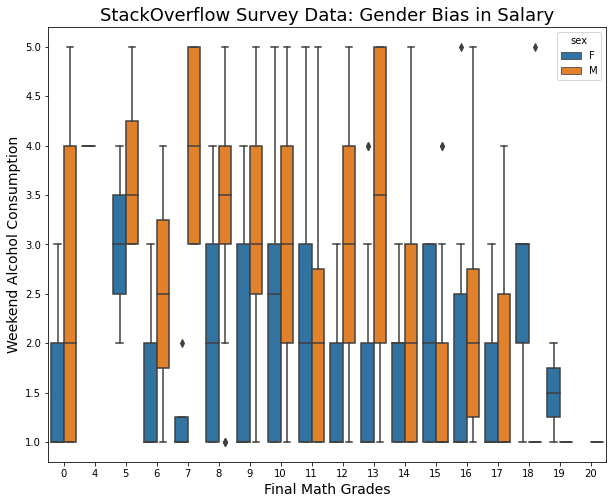

In [188]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="G3", y="Walc", hue='sex',data=mat)
plt.ylabel("Weekend Alcohol Consumption", size=14)
plt.xlabel("Final Math Grades",size=14)
plt.title("StackOverflow Survey Data: Gender Bias in Salary", size=18)
plt.savefig("grouped_boxplot_Seaborn_boxplot_Python.png")

## Portugese score dataset

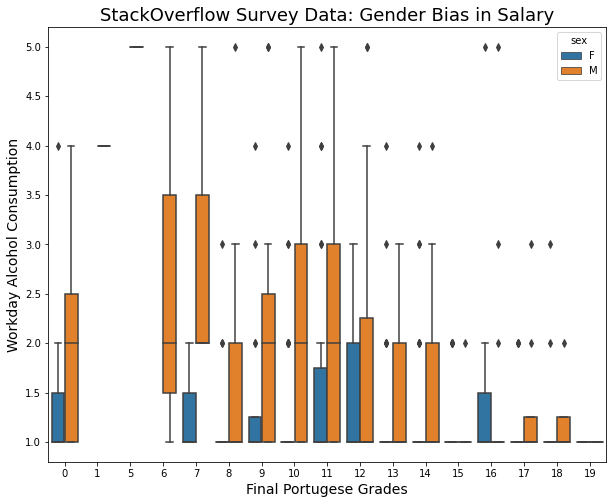

In [186]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="G3", y="Dalc", hue='sex',data=por)
plt.ylabel("Workday Alcohol Consumption", size=14)
plt.xlabel("Final Portugese Grades",size=14)
plt.title("StackOverflow Survey Data: Gender Bias in Salary", size=18)
plt.savefig("grouped_boxplot_Seaborn_boxplot_Python.png")

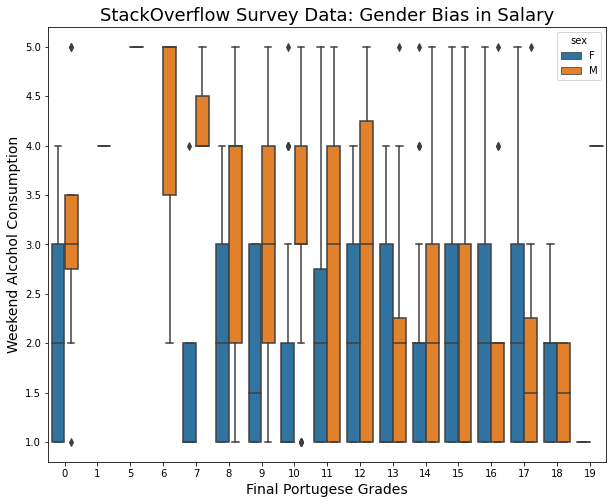

In [187]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="G3", y="Walc", hue='sex',data=por)
plt.ylabel("Weekend Alcohol Consumption", size=14)
plt.xlabel("Final Portugese Grades",size=14)
plt.title("StackOverflow Survey Data: Gender Bias in Salary", size=18)
plt.savefig("grouped_boxplot_Seaborn_boxplot_Python.png")

## Scatter matrix

## Math

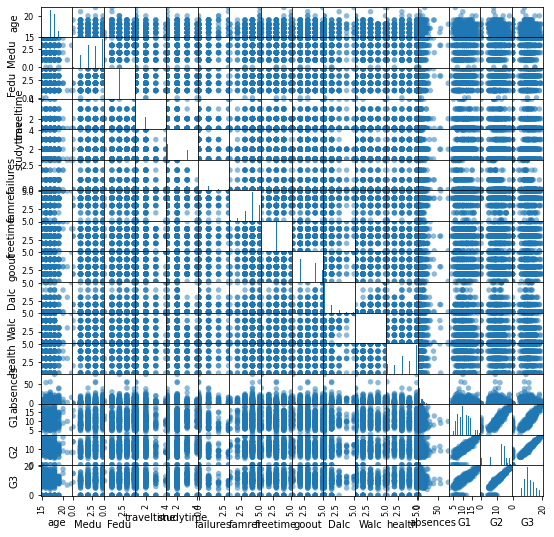

In [49]:
pd.plotting.scatter_matrix(mat.select_dtypes(int), figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.5)
plt.show()

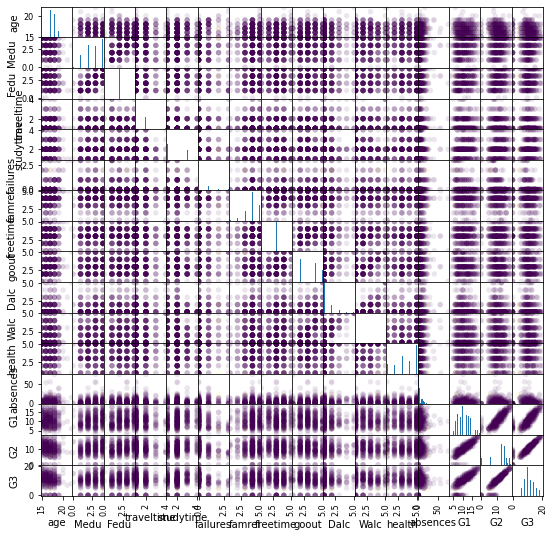

In [238]:
pd.plotting.scatter_matrix(mat.select_dtypes(int), figsize=(9, 9),c = pd.get_dummies(mat['G3']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 50}, s=30, alpha=.1)
plt.show()

In [ ]:
## Portugese

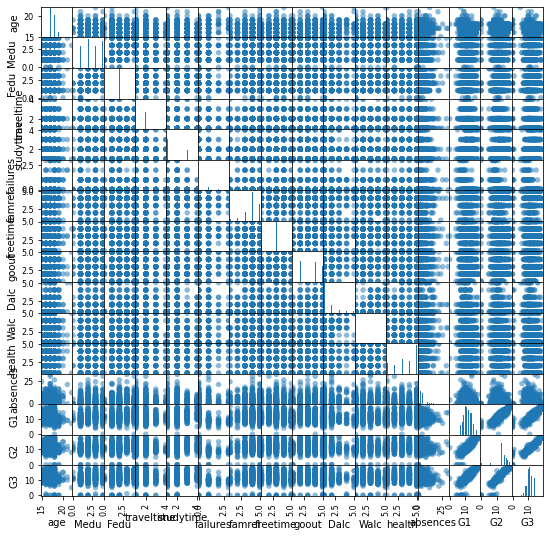

In [239]:
pd.plotting.scatter_matrix(por.select_dtypes(int), figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.5)
plt.show()

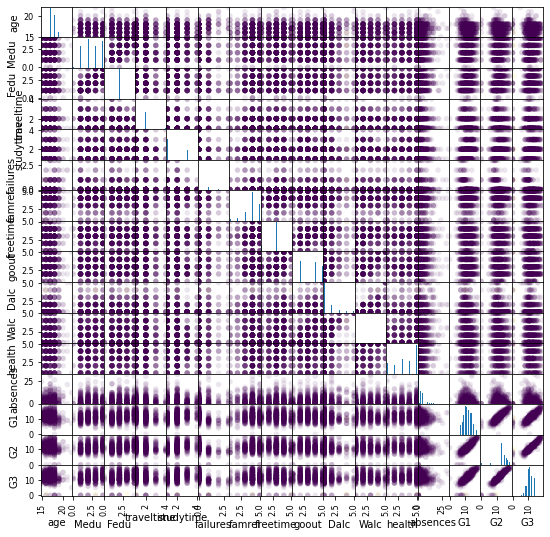

In [240]:
pd.plotting.scatter_matrix(por.select_dtypes(int), figsize=(9, 9),c = pd.get_dummies(por['G3']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 50}, s=30, alpha=.1)
plt.show()

## Data preprocessing

## Separate feature matrix and target variable

In [204]:
#Math
y_mat = mat['G3'] #predict final grades so make final grades 'G3' the target variable
X_mat = mat.loc[:, mat.columns != 'G3'] 
print(y_mat)
print(X_mat.head())

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  romantic famrel  freetime  goout  Dalc Walc health absences  G1  G2  
0       no      4         3      4     1    1      3        6   5   6  
1       no      5         3      3     1    1      3        4   5   5  
2       no      4         3      2     2    3      3       10   7   8  
3      yes      3         2      2     1    1      5        2  15  14  
4      

In [205]:
#Portugese
y_por = por['G3'] #predict final grades so make final grades 'G3' the target variable
X_por = por.loc[:, por.columns != 'G3'] # all other columns are features
print(y_por)
print(X_por.head())

0      11
1      11
2      12
3      14
4      13
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 649, dtype: int64
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  romantic famrel  freetime  goout  Dalc Walc health absences  G1  G2  
0       no      4         3      4     1    1      3        4   0  11  
1       no      5         3      3     1    1      3        2   9  11  
2       no      4         3      2     2    3      3        6  12  13  
3      yes      3         2      2     1    1      5        0  14  14  
4      

## Split data

In [217]:
#Math
random_state = 42

# first split to separate out the training set
X_mat_train, X_mat_other, y_mat_train, y_mat_other = train_test_split(X_mat,y_mat,train_size = 0.6,random_state=random_state)
print('training set:',X_mat_train.shape, y_mat_train.shape) # 60% of points are in train
print(X_mat_other.shape, y_mat_other.shape) # 40% of points are in other

# second split to separate out the validation and test sets
X_mat_val, X_mat_test, y_mat_val, y_mat_test = train_test_split(X_mat_other,y_mat_other,train_size = 0.5,random_state=random_state)
print('validation set:',X_mat_val.shape, y_mat_val.shape) # 20% of points are in validation
print('test set:',X_mat_test.shape, y_mat_test.shape) # 20% of points are in test

training set: (237, 32) (237,)
(158, 32) (158,)
validation set: (79, 32) (79,)
test set: (79, 32) (79,)


In [219]:
#Portugese
random_state = 42

# first split to separate out the training set
X_por_train, X_por_other, y_por_train, y_por_other = train_test_split(X_por,y_por,train_size = 0.6,random_state=random_state)
print('training set:',X_por_train.shape, y_train.shape) # 60% of points are in train
print(X_por_other.shape, y_por_other.shape) # 40% of points are in other

# second split to separate out the validation and test sets
X_por_val, X_por_test, y_por_val, y_por_test = train_test_split(X_por_other,y_por_other,train_size = 0.5,random_state=random_state)
print('validation set:',X_por_val.shape, y_por_val.shape) # 20% of points are in validation
print('test set:',X_por_test.shape, y_por_test.shape) # 20% of points are in test

training set: (389, 32) (237,)
(260, 32) (260,)
validation set: (130, 32) (130,)
test set: (130, 32) (130,)


## Encoding 

## Apply MixMax Scaler to Continous Columns with Bounds - 'Age' column

In [225]:
minmax_ftrs = ['age','absences']
#Math
scaler = MinMaxScaler()
scaler.fit(X_mat_train[minmax_ftrs])
print("Math train set", scaler.transform(X_mat_train[minmax_ftrs]))
print("Math validation set",scaler.transform(X_mat_val[minmax_ftrs])) 
print("Math test set",scaler.transform(X_mat_test[minmax_ftrs])) 

#Potugese
scaler = MinMaxScaler()
scaler.fit(X_por_train[minmax_ftrs])
print("Potugese train set",scaler.transform(X_por_train[minmax_ftrs]))
print("Potugese train set",scaler.transform(X_por_val[minmax_ftrs])) 
print("Potugese train set",scaler.transform(X_por_test[minmax_ftrs])) 

Math train set [[0.42857143 0.09333333]
 [0.28571429 0.02666667]
 [0.42857143 0.13333333]
 [0.14285714 0.24      ]
 [0.28571429 0.24      ]
 [0.         0.02666667]
 [0.14285714 0.02666667]
 [0.14285714 0.05333333]
 [0.         0.16      ]
 [0.14285714 0.24      ]
 [0.14285714 0.02666667]
 [0.14285714 0.02666667]
 [0.42857143 0.06666667]
 [0.14285714 0.02666667]
 [0.28571429 0.18666667]
 [0.         0.02666667]
 [0.14285714 0.        ]
 [0.14285714 0.09333333]
 [0.28571429 0.        ]
 [0.14285714 0.02666667]
 [0.14285714 0.05333333]
 [0.14285714 0.13333333]
 [0.14285714 0.08      ]
 [0.42857143 0.01333333]
 [0.42857143 0.13333333]
 [0.28571429 0.4       ]
 [0.         0.        ]
 [0.         0.        ]
 [0.28571429 0.13333333]
 [0.14285714 0.05333333]
 [0.42857143 0.        ]
 [0.28571429 0.05333333]
 [0.42857143 0.        ]
 [0.28571429 0.        ]
 [0.28571429 0.02666667]
 [0.42857143 0.        ]
 [0.28571429 0.74666667]
 [0.28571429 0.02666667]
 [0.57142857 0.04      ]
 [0.571428

## Apply One Hot Enconder to categorical columns

In [226]:
#collect all categorical features that have not been processed
onehot_ftrs = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason', 'guardian','schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher','internet','romantic']
# initialize the encoder
enc = OneHotEncoder(sparse=False,handle_unknown='ignore') # by default, OneHotEncoder returns a sparse matrix. sparse=False returns a 2D array
# fit the training data
# Math
enc.fit(X_mat_train[onehot_ftrs])
print('Math feature names:',enc.get_feature_names(onehot_ftrs))
# Portugese
enc.fit(X_por_train[onehot_ftrs])
print('Portugese feature names:',enc.get_feature_names(onehot_ftrs))

Math feature names: ['school_GP' 'school_MS' 'sex_F' 'sex_M' 'address_R' 'address_U'
 'famsize_GT3' 'famsize_LE3' 'Pstatus_A' 'Pstatus_T' 'Mjob_at_home'
 'Mjob_health' 'Mjob_other' 'Mjob_services' 'Mjob_teacher' 'Fjob_at_home'
 'Fjob_health' 'Fjob_other' 'Fjob_services' 'Fjob_teacher' 'reason_course'
 'reason_home' 'reason_other' 'reason_reputation' 'guardian_father'
 'guardian_mother' 'guardian_other' 'schoolsup_no' 'schoolsup_yes'
 'famsup_no' 'famsup_yes' 'paid_no' 'paid_yes' 'activities_no'
 'activities_yes' 'nursery_no' 'nursery_yes' 'higher_no' 'higher_yes'
 'internet_no' 'internet_yes' 'romantic_no' 'romantic_yes']
Portugese feature names: ['school_GP' 'school_MS' 'sex_F' 'sex_M' 'address_R' 'address_U'
 'famsize_GT3' 'famsize_LE3' 'Pstatus_A' 'Pstatus_T' 'Mjob_at_home'
 'Mjob_health' 'Mjob_other' 'Mjob_services' 'Mjob_teacher' 'Fjob_at_home'
 'Fjob_health' 'Fjob_other' 'Fjob_services' 'Fjob_teacher' 'reason_course'
 'reason_home' 'reason_other' 'reason_reputation' 'guardian_fat

In [232]:
# Math 
# transform X_train
onehot_mat_train = enc.transform(X_mat_train[onehot_ftrs])
print('Math transformed train features:', onehot_mat_train)
# transform X_val
onehot_mat_val = enc.transform(X_mat_val[onehot_ftrs])
print('Math transformed val features:', onehot_mat_val)
# transform X_test
onehot_mat_test = enc.transform(X_mat_test[onehot_ftrs])
print('Math transformed test features:', onehot_mat_test)

Math transformed train features: [[1. 0. 1. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]
 ...
 [1. 0. 1. ... 1. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 1. 0.]]
Math transformed val features: [[1. 0. 1. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 0. 1.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 0. 0. ... 1. 1. 0.]
 [1. 0. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 1. 0.]]
Math transformed test features: [[1. 0. 0. ... 1. 0. 1.]
 [1. 0. 1. ... 1. 1. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 0. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 [1. 0. 1. ... 1. 1. 0.]]


In [234]:
# Portugese
# transform X_train
onehot_por_train = enc.transform(X_train[onehot_ftrs])
print('Portugese transformed train features:', onehot_por_train)
# transform X_val
onehot_por_val = enc.transform(X_val[onehot_ftrs])
print('Portugesetransformed val features:', onehot_por_val)
# transform X_test
onehot_por_test = enc.transform(X_test[onehot_ftrs])
print('Portugese transformed test features:', onehot_por_test)

Portugese transformed train features: [[1. 0. 1. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]
 ...
 [1. 0. 1. ... 1. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 1. 0.]]
Portugesetransformed val features: [[1. 0. 1. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 0. 1.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 0. 0. ... 1. 1. 0.]
 [1. 0. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 1. 0.]]
Portugese transformed test features: [[1. 0. 0. ... 1. 0. 1.]
 [1. 0. 1. ... 1. 1. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 0. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 [1. 0. 1. ... 1. 1. 0.]]


In [237]:
# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
         ('minmax', MinMaxScaler(), minmax_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here
#Math
X_mat_train_prep = clf.fit_transform(X_mat_train)
X_mat_val_prep = clf.transform(X_mat_val)
X_mat_test_prep = clf.transform(X_mat_test)

print("Math feature train set", X_mat_train.shape)
print("Math feature validation set",X_mat_val_prep.shape)
print("Math feature test set", X_mat_test_prep)

#Portugese
X_por_train_prep = clf.fit_transform(X_por_train)
X_por_val_prep = clf.transform(X_por_val)
X_por_test_prep = clf.transform(X_por_test)

print("Portugese feature train set", X_por_train.shape)
print("Portugese feature validation set",X_por_val_prep.shape)
print("Portugese feature test set", X_por_test_prep)

Math feature train set (237, 32)
Math feature validation set (79, 45)
Math feature test set [[1.         0.         0.         ... 1.         0.57142857 0.        ]
 [1.         0.         1.         ... 0.         0.14285714 0.        ]
 [1.         0.         1.         ... 0.         0.28571429 0.32      ]
 ...
 [1.         0.         1.         ... 0.         0.42857143 0.08      ]
 [0.         1.         1.         ... 0.         0.28571429 0.18666667]
 [1.         0.         1.         ... 0.         0.14285714 0.18666667]]
Portugese feature train set (389, 32)
Portugese feature validation set (130, 45)
Portugese feature test set [[0.         1.         0.         ... 1.         0.42857143 0.        ]
 [1.         0.         1.         ... 1.         0.42857143 0.3125    ]
 [1.         0.         1.         ... 0.         0.         0.        ]
 ...
 [1.         0.         0.         ... 0.         0.14285714 0.0625    ]
 [1.         0.         0.         ... 0.         0.4285714